In [31]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_validate

In [25]:
pwd()

'C:\\Users\\Koushik'

In [26]:
dataset = pd.read_excel("Folds5x2_pp.xlsx") #load dataset
dataset.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [4]:
dataset.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

In [5]:
dataset.PE.describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64

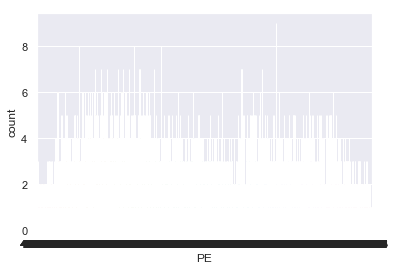

In [6]:
sns.countplot(dataset['PE'],label="Count")

In [85]:
dataset.isnull().head()

AT      V     AP     RH     PE
0  False  False  False  False  False
1  False  False  False  False  False
2  False  False  False  False  False
3  False  False  False  False  False
4  False  False  False  False  False

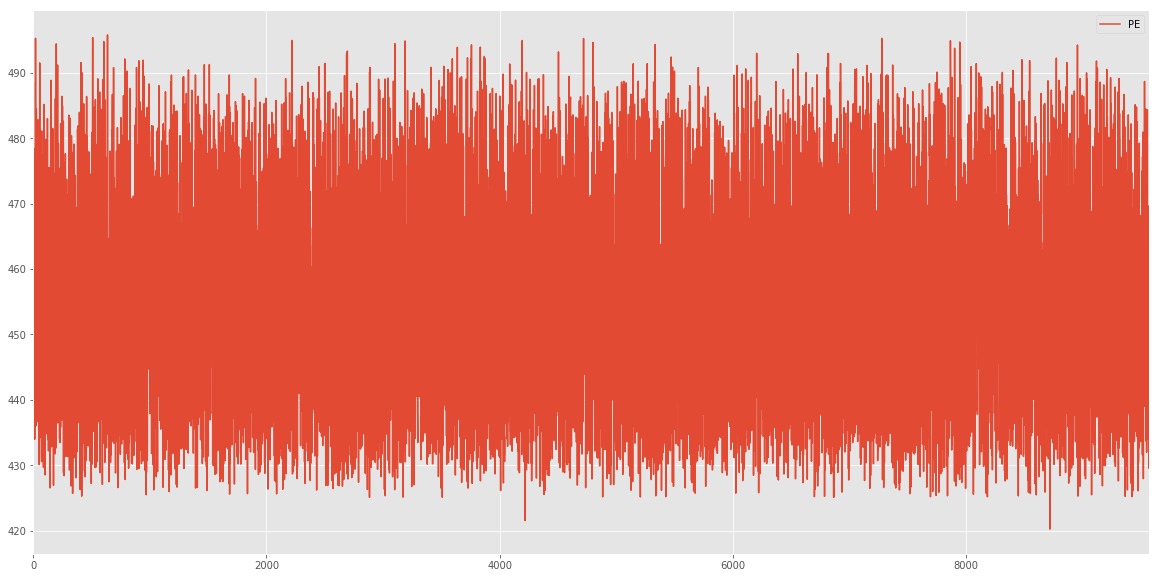

In [22]:
dataset.plot(y="PE",figsize=(20,10))

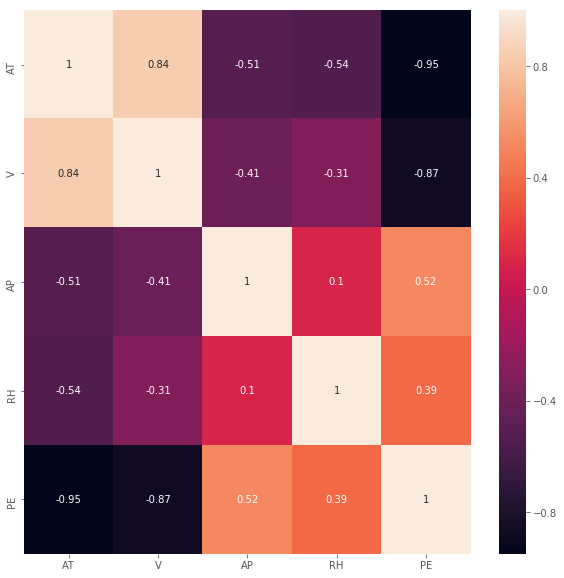

In [23]:
plt.figure(figsize  =(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

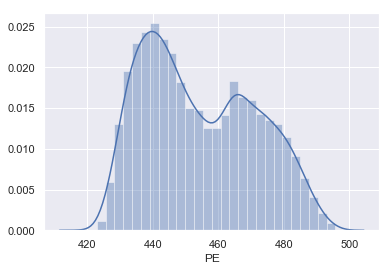

In [86]:
#sns.jointplot('AT', 'PE', data=dataset)
#sns.jointplot('V', 'PE', data=dataset)
#sns.jointplot('AP', 'PE', data=dataset)
#sns.jointplot('RH', 'PE', data=dataset)
sns.distplot(dataset.PE); 

In [88]:
sns.lineplot('AT', 'PE', data=dataset[0:200])

In [42]:
#Pairwise Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataset, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

# Split using random splitting methods

In [7]:
msk = np.random.rand(len(dataset)) <= 0.7

train = dataset[msk]
test = dataset[~msk]

In [8]:
X_train = train[['AT','V','AP','RH']]
X_test = test[['AT','V','AP','RH']]

In [9]:
Y_train = train['PE']
Y_test = test['PE']

# Machine Learning: Linear Regression

In [10]:
#Linear Regression
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
Y_prediction = LR.predict(X_test)

In [12]:
LR.score(X_test,Y_test)

0.9318797828951003

In [37]:
LR.score(X_train, Y_train)

0.9273628625395166

In [13]:
dataset = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction})
dataset.head(10)

Actual Result  Predicted Result
7          478.42        478.139211
10         453.02        459.478744
12         440.29        438.834731
15         462.19        458.146413
16         467.54        463.837905
18         459.85        467.266673
25         443.25        434.673938
30         445.11        448.692779
32         440.98        433.857206
35         465.86        467.422294

In [14]:
dataset['Differences'] = abs(dataset['Actual Result'] - dataset['Predicted Result'])
dataset.head()

Actual Result  Predicted Result  Differences
7          478.42        478.139211     0.280789
10         453.02        459.478744     6.458744
12         440.29        438.834731     1.455269
15         462.19        458.146413     4.043587
16         467.54        463.837905     3.702095

In [15]:
sns.lineplot(Y_test[0:200], Y_prediction[0:200])

In [41]:
SVMachine = svm.SVR(kernel='rbf')
SVMachine.fit(X_train, Y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
Y_prediction_SVM = SVMachine.predict(X_test)

In [43]:
SVMachine.score(X_test, Y_test)

0.38206262759474435

In [44]:
dataset = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction_SVM})
dataset.head(10)

Actual Result  Predicted Result
7          478.42        453.138532
10         453.02        453.722089
12         440.29        446.305589
15         462.19        454.281280
16         467.54        452.473544
18         459.85        452.893202
25         443.25        443.655231
30         445.11        450.438739
32         440.98        447.580742
35         465.86        453.896754

In [46]:
dataset['Differences'] = abs(dataset['Actual Result'] - dataset['Predicted Result'])
dataset.head(10)

Actual Result  Predicted Result  Differences
7          478.42        453.138532    25.281468
10         453.02        453.722089     0.702089
12         440.29        446.305589     6.015589
15         462.19        454.281280     7.908720
16         467.54        452.473544    15.066456
18         459.85        452.893202     6.956798
25         443.25        443.655231     0.405231
30         445.11        450.438739     5.328739
32         440.98        447.580742     6.600742
35         465.86        453.896754    11.963246

# Deep Learning: LSTM

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time